# **Football Forecasting Workshop**

### Warwick Data Science Society (WDSS)

<img src="logo_subtitle.png" width=200 />

### Sponsor

<img src="mustard-systems-logo.png" width=180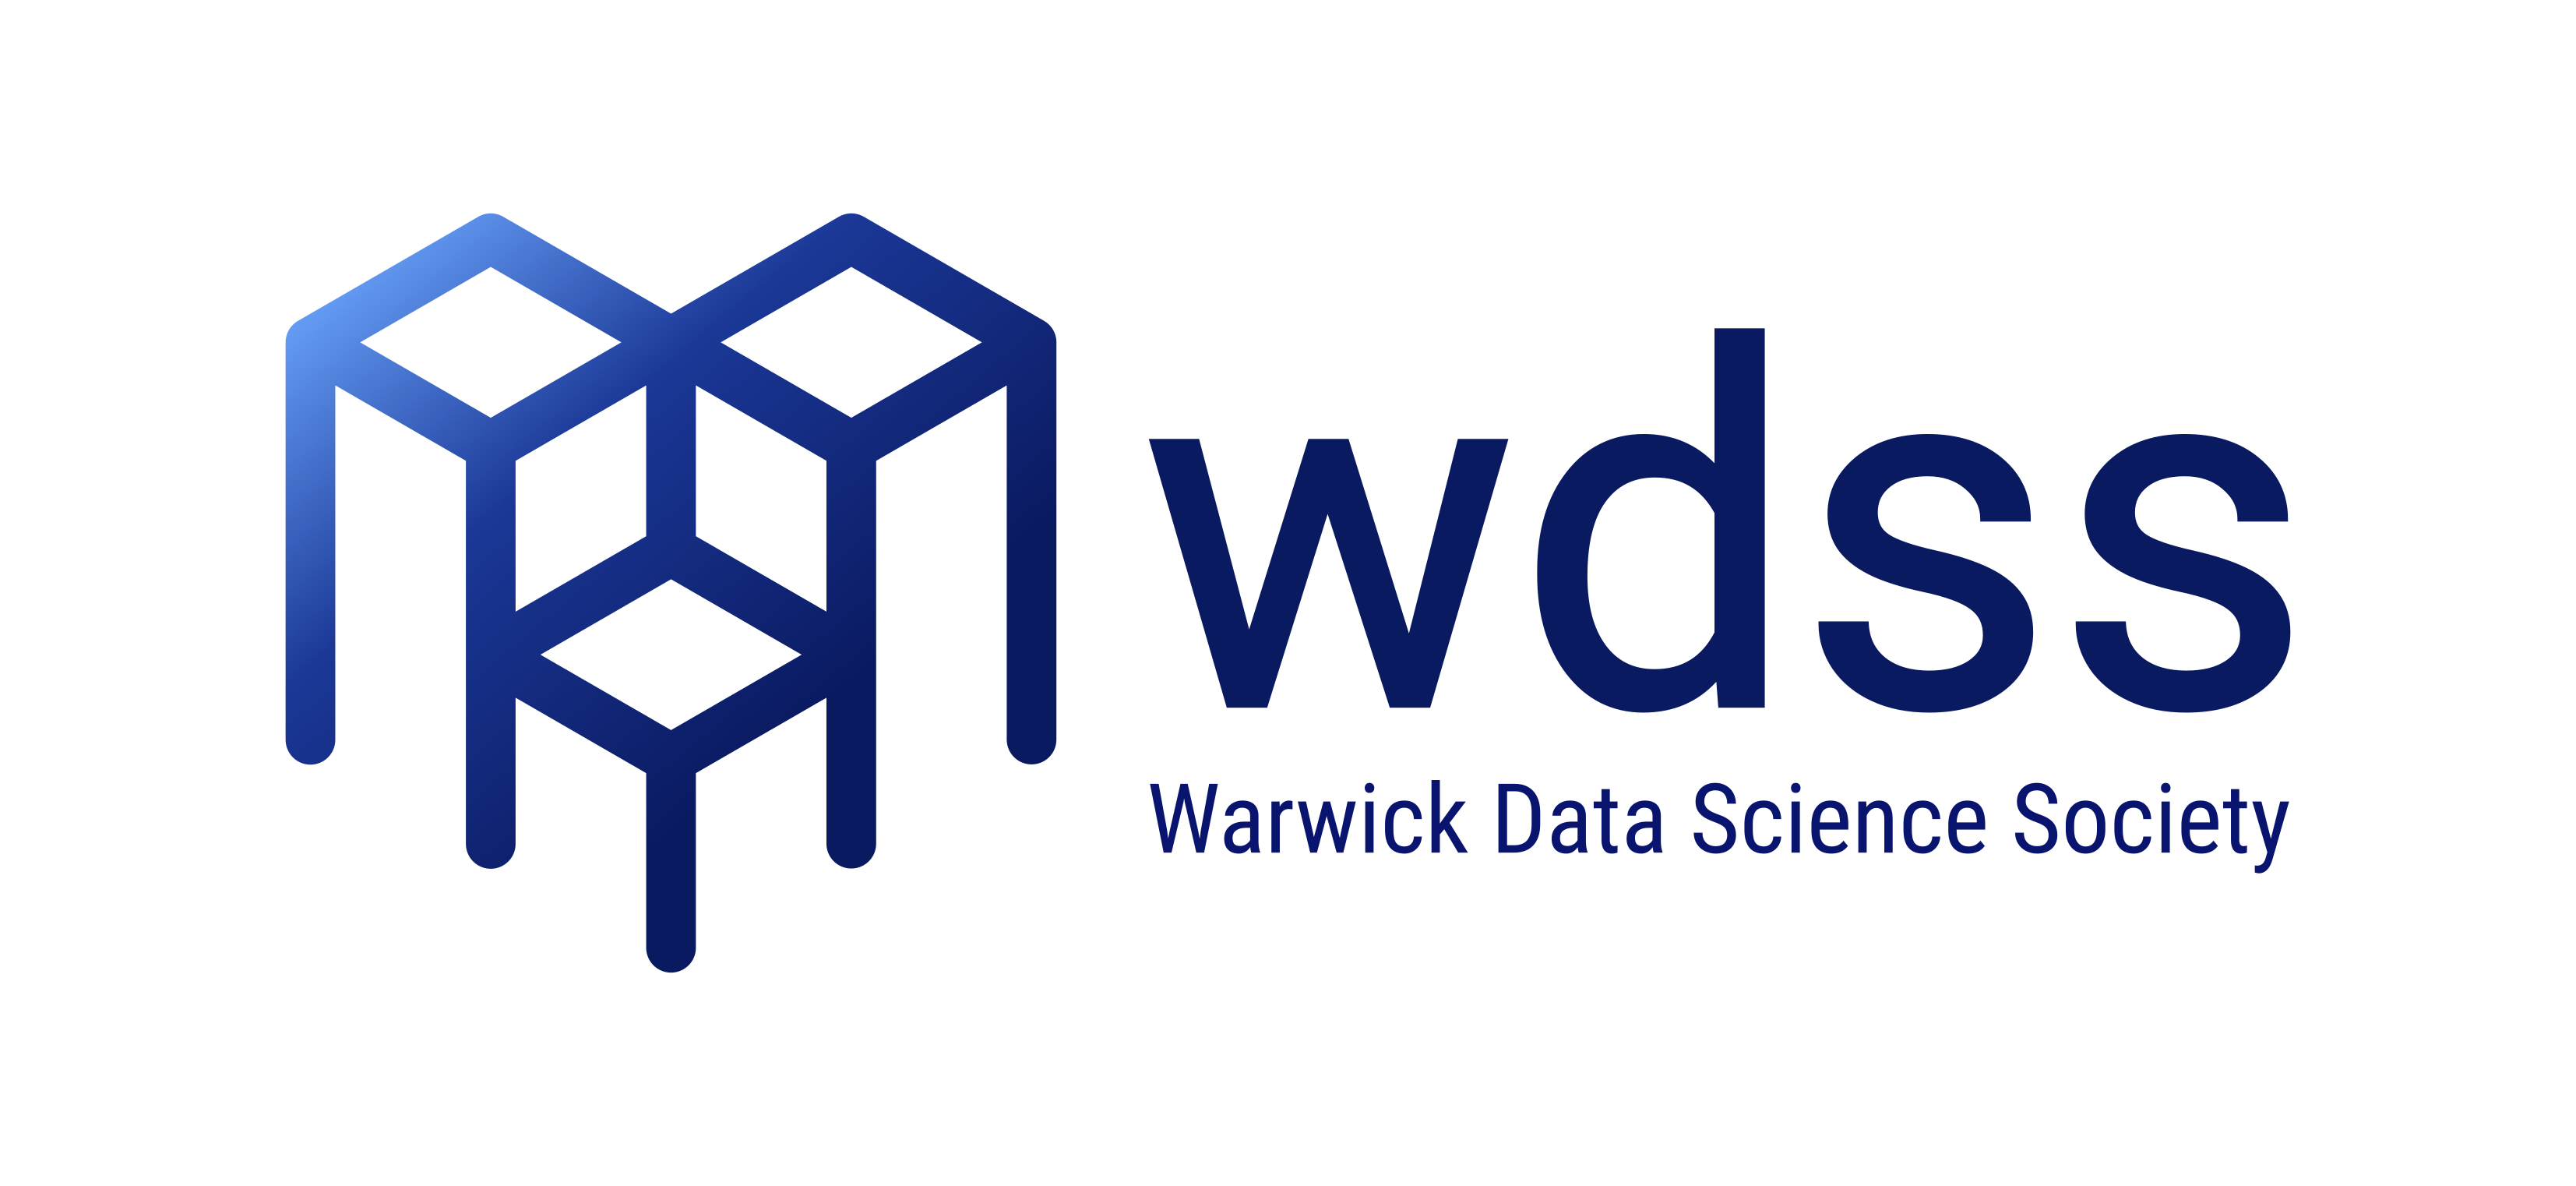 />

### Modules

In [1]:
# Import some modules
from scipy.stats import poisson, skellam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

### Data

https://www.football-data.co.uk/notes.txt

In [2]:
# Function to retrieve EPL matches from any given year
def get_premier_league_data(start_year):
    season = str(start_year)[-2:] + str(start_year + 1)[-2:]
    data = pd.read_csv("http://www.football-data.co.uk/mmz4281/" + season + "/E0.csv")
    data = data[['HomeTeam','AwayTeam','FTHG','FTAG', 'FTR','Date']]
    data = data.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals', 'FTR':'Result'})
    return data

In [3]:
data = get_premier_league_data(2018)
data.head()

,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,Date
0,Man United,Leicester,2,1,H,10/08/2018
1,Bournemouth,Cardiff,2,0,H,11/08/2018
2,Fulham,Crystal Palace,0,2,A,11/08/2018
3,Huddersfield,Chelsea,0,3,A,11/08/2018
4,Newcastle,Tottenham,1,2,A,11/08/2018


### Model

In [4]:
data.mean()

HomeGoals    1.568421
AwayGoals    1.252632
dtype: float64

In [5]:
# Prepare the dataset
# Separate home and away teams/goals - then concatenate
goal_model_data = pd.concat([data[['HomeTeam','AwayTeam','HomeGoals']].assign(home=1).rename(
            columns={'HomeTeam':'team', 'AwayTeam':'opponent','HomeGoals':'goals'}),
           data[['AwayTeam','HomeTeam','AwayGoals']].assign(home=0).rename(
            columns={'AwayTeam':'team', 'HomeTeam':'opponent','AwayGoals':'goals'})])

In [6]:
goal_model_data.head(10)

,team,opponent,goals,home
0,Man United,Leicester,2,1
1,Bournemouth,Cardiff,2,1
2,Fulham,Crystal Palace,0,1
3,Huddersfield,Chelsea,0,1
4,Newcastle,Tottenham,1,1
5,Watford,Brighton,2,1
6,Wolves,Everton,2,1
7,Arsenal,Man City,0,1
8,Liverpool,West Ham,4,1
9,Southampton,Burnley,0,1


In [7]:
# Building the model
# Poisson Regression: log-linear model
poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data, 
                        family=sm.families.Poisson()).fit()

In [8]:
# Get a statistical summary of the poisson model
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  760
Model:                            GLM   Df Residuals:                      720
Model Family:                 Poisson   Df Model:                           39
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1065.1
Date:                Sat, 15 Jan 2022   Deviance:                       762.55
Time:                        13:55:23   Pearson chi2:                     656.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.5061      0.188      2.685      0.007       0.137       0.876
team[T.Bournemouth]           -0.2470      0.178     -1.388      0.165      -0.596       0.102
team[T.Brighton]              -0.7283      0.206     -3.538      0.000      -1.132      -0.325
team[T.Burnley]               -0.4684      0.190     -2.468      0.014      -0.841      -0.096
team[T.Cardiff]               -0.7485      0.208     -3.600      0.000      -1.156      -0.341
team[T.Chelsea]               -0.1597      0.172     -0.927      0.354      -0.497       0.178
team[T.Crystal Palace]        -0.3578      0.183     -1.957      0.050      -0.716       0.000
team[T.Everton]               -0.3074      0.180     -1.710      0.087      -0.660       0.045
team[T.Fulham]                -0.7366      0.208     -3.542      0.000      -1.144      -0.329
team[T.Huddersfield]          -1.1778      0.243     -4.837      0.000      -1.655      -0.701
team[T.Leicester]             -0.3627      0.183     -1.984      0.047      -0.721      -0.004
team[T.Liverpool]              0.1698      0.158      1.074      0.283      -0.140       0.480
team[T.Man City]               0.2362      0.156      1.515      0.130      -0.069       0.542
team[T.Man United]            -0.1135      0.171     -0.664      0.507      -0.448       0.221
team[T.Newcastle]             -0.5573      0.194     -2.874      0.004      -0.937      -0.177
team[T.Southampton]           -0.4714      0.190     -2.483      0.013      -0.843      -0.099
team[T.Tottenham]             -0.0980      0.169     -0.578      0.563      -0.430       0.234
team[T.Watford]               -0.3324      0.182     -1.829      0.067      -0.689       0.024
team[T.West Ham]              -0.3363      0.182     -1.850      0.064      -0.693       0.020
team[T.Wolves]                -0.4465      0.187     -2.384      0.017      -0.814      -0.079
opponent[T.Bournemouth]        0.3008      0.184      1.631      0.103      -0.061       0.662
opponent[T.Brighton]           0.1253      0.191      0.657      0.511      -0.249       0.499
opponent[T.Burnley]            0.2607      0.186      1.405      0.160      -0.103       0.624
opponent[T.Cardiff]            0.2644      0.185      1.430      0.153      -0.098       0.627
opponent[T.Chelsea]           -0.2790      0.213     -1.310      0.190      -0.697       0.139
opponent[T.Crystal Palace]     0.0167      0.196      0.085      0.932      -0.368       0.402
opponent[T.Everton]           -0.1224      0.204     -0.601      0.548      -0.522       0.277
opponent[T.Fulham]             0.4252      0.179      2.374      0.018       0.074       0.776
opponent[T.Huddersfield]       0.3495      0.181      1.928      0.054      -0.006       0.705
opponent[T.Leicester]         -0.0827      

### Simulation & Validation

In [9]:
# Build a function to simulate a match using the newly generated poisson model
# Outputs the probability distribution 
# Considers 8 goals as a maximum for either team

def simulate_match(homeTeam, awayTeam, max_goals=8, foot_model=poisson_model):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam, 
                                                            'opponent': awayTeam,'home':1},
                                                      index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam, 
                                                            'opponent': homeTeam,'home':0},
                                                      index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return(np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

# Test the function
simulate_match('Chelsea', 'Man City')

array([[9.03985522e-02, 1.43662567e-01, 1.14155220e-01, 6.04723249e-02,
        2.40258533e-02, 7.63644036e-03, 2.02265523e-03, 4.59204323e-04,
        9.12216930e-05],
       [7.36127965e-02, 1.16986423e-01, 9.29581806e-02, 4.92434540e-02,
        1.95645860e-02, 6.21845944e-03, 1.64707624e-03, 3.73936458e-04,
        7.42830915e-05],
       [2.99719612e-02, 4.76318346e-02, 3.78485687e-02, 2.00498142e-02,
        7.96585706e-03, 2.53188894e-03, 6.70618528e-04, 1.52250825e-04,
        3.02448765e-05],
       [8.13552809e-03, 1.29290881e-02, 1.02735384e-02, 5.44228072e-03,
        2.16223601e-03, 6.87250775e-04, 1.82031327e-04, 4.13266538e-05,
        8.20960765e-06],
       [1.65621838e-03, 2.63208401e-03, 2.09147124e-03, 1.10793119e-03,
        4.40184703e-04, 1.39909463e-04, 3.70576594e-05, 8.41321703e-06,
        1.67129938e-06],
       [2.69736325e-04, 4.28668512e-04, 3.40622816e-04, 1.80440751e-04,
        7.16897033e-05, 2.27860437e-05, 6.03531333e-06, 1.37019989e-06,
        2.7

In [10]:
# Similar function, selecting most probable scoreline

def simulate_match_output(homeTeam, awayTeam, max_goals=8, foot_model=poisson_model):
    # Predict avg goals
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam, 
                                                            'opponent': awayTeam,'home':1},
                                                      index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam, 
                                                            'opponent': homeTeam,'home':0},
                                                      index=[1])).values[0]
    
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    distribution = np.outer(np.array(team_pred[0]), np.array(team_pred[1])) # multiply distributions together
    
    # Get most likely score from the matrix
    h = np.argmax(distribution)//(max_goals + 1) 
    a = np.argmax(distribution)%(max_goals + 1) 
    z = np.max(distribution)
    output = homeTeam + ": " + str(h) + "\n" + awayTeam + ": " + str(a) + "\nProb: "+ str(round(z, 2))
    
    return print(output)
    return(h, a)

simulate_match_output('Chelsea', 'Man City')

Chelsea: 0
Man City: 1
Prob: 0.14


### Plots

In [11]:
x = simulate_match('Chelsea', 'Man City')

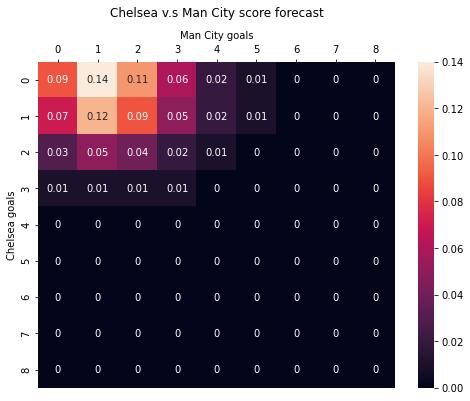

In [12]:
# Visualizing distribution in a heatmap
x = x.round(2)
f, axs = plt.subplots(figsize=(8, 6))
sns.heatmap(x, annot=True)
axs.xaxis.tick_top() # x axis on top
axs.xaxis.set_label_position('top')
plt.title("Chelsea v.s Man City score forecast", y=1.12)
plt.xlabel("Man City goals", labelpad=6)
plt.ylabel("Chelsea goals")
plt.show()

### Data

#### Season Standings

https://www.rotowire.com//soccer/tables/standings.php?league=EPL&length=total&season=2019

https://www.rotowire.com/soccer/league-table.php?season=2018


#### More

Description of football-data's column names: https://www.football-data.co.uk/notes.txt


Future Fixtures CSV: https://fixturedownload.com/download/epl-2021-GMTStandardTime.csv
